# 📊 Week 03 – Interactive Financial Dashboard  
## Phase 1: Colab Coding (Backend & Logic)

### 🔍 Project Overview
This project builds the core backend logic for an interactive financial dashboard.  
In this phase, we focus on dynamically fetching stock market data, cleaning it, engineering meaningful financial features, and visualizing key market insights.  
The entire pipeline is designed to be **stock-agnostic**, meaning the same logic works for any valid stock ticker and can later be deployed as a live web application using Streamlit.

---

## 🧩 Phase 1 Workflow Breakdown

### 1️⃣ Project Setup & Environment
- Import all required Python libraries for data handling, visualization, and finance
- Configure the notebook for reproducible analysis

---

### 2️⃣ Dynamic Stock Data Fetching
- Accept a stock ticker as input
- Fetch historical OHLCV data programmatically
- Ensure flexibility to handle different markets (e.g. US, Indian equities)

---

### 3️⃣ Data Cleaning & Validation
- Handle missing or inconsistent data
- Ensure proper date indexing and data types
- Prepare a clean time-series dataset for analysis

---

### 4️⃣ Feature Engineering (Technical Indicators)
- Compute daily returns
- Generate moving averages (short-term and long-term)
- Calculate rolling volatility and trend-related features
- Keep the feature pipeline reusable and scalable

---

### 5️⃣ Exploratory Data Visualization
- Visualize price movements with technical indicators
- Plot volume trends and return distributions
- Use clear, interpretable charts for financial insights

---

### 6️⃣ Modular Function Design
- Organize logic into reusable functions
- Maintain separation between data fetching, processing, and plotting
- Prepare the codebase for seamless Streamlit integration in Phase 2

---

### ✅ Phase 1 Outcome
By the end of this phase, we have a complete, reusable backend system that:
- Works for any stock ticker
- Produces engineered financial features
- Generates insightful visualizations
- Is ready to be deployed as an interactive dashboard


# **Section 1**


*    Import all required Python libraries for data handling, visualization, and finance ✅
*   Configure the notebook for reproducible analysis ✅




In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [ ]:
ticker = "BTC"

df = yf.download(
    ticker,
    start= "2023-01-01",
    end= dt.datetime.today().strftime("%Y-%m-%d")
)

df.shape

/tmp/ipython-input-4016629440.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(
[*********************100%***********************]  1 of 1 completed


(371, 5)

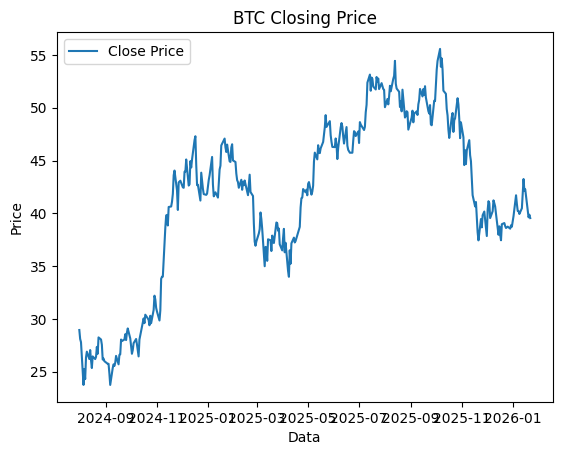

In [ ]:
plt.plot(df.index, df["Close"], label= "Close Price")
plt.title(f"{ticker} Closing Price")
plt.xlabel("Data")
plt.ylabel("Price")
plt.legend()
plt.show()

# Section 2


- Accept a stock ticker as input
(Made it Dynamic) ✅
- Fetch historical OHLCV data programmatically ✅
- Ensure flexibility to handle different markets (e.g. US, Indian equities)✅



In [ ]:
ticker = str.upper(input("Enter a stock name:"))
start_date = input("Enter start date (YYYY-MM-DD):")
today = dt.datetime.today().strftime("%Y-%m-%d")
end_date = str.lower(input("Enter end date Maually or today's date: "))
if end_date == "today":
    end_date = today
else:
    end_date = str.upper(input("Enter end date (YYYY-MM-DD):"))

DF  = yf.download(
    ticker,
    start= start_date,
    end= end_date
)

Enter a stock name:AMZN
Enter start date (YYYY-MM-DD):2000-01-01
Enter end date Maually or today's date: today


/tmp/ipython-input-1226231998.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  DF  = yf.download(
[*********************100%***********************]  1 of 1 completed


In [ ]:
DF.columns


MultiIndex([( 'Close', 'AMZN'),
            (  'High', 'AMZN'),
            (   'Low', 'AMZN'),
            (  'Open', 'AMZN'),
            ('Volume', 'AMZN')],
           names=['Price', 'Ticker'])

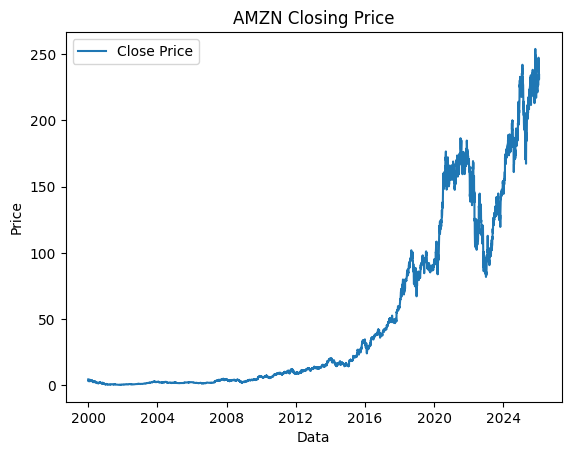

In [ ]:
plt.plot(DF.index, DF["Close"], label= "Close Price")
plt.title(f"{ticker} Closing Price")
plt.xlabel("Data")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
DF.sample(5)

Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,
2006-11-30,2.017,2.032000,1.992500,2.021000,126926000
2001-01-22,0.925,0.996875,0.925000,0.975000,87972000
2020-10-02,156.250,159.789993,156.149994,157.681503,112262000
2006-10-10,1.631,1.679000,1.624500,1.663500,126668000
2003-03-10,1.144,1.148000,1.127500,1.130000,88120000


In [ ]:
DF.columns = DF.columns.droplevel(1)
DF.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

In [ ]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC,BTC,BTC,BTC,BTC
Date,,,,,
2024-07-31,28.950001,29.650000,28.799999,29.500000,930940
2024-08-01,28.100000,28.799999,27.600000,28.650000,8564500
2024-08-02,27.799999,29.049999,27.650000,28.750000,2412560
2024-08-05,23.750000,24.650000,22.000000,22.049999,3141140
2024-08-06,25.250000,25.350000,24.150000,24.500000,1690140


In [ ]:
if DF.empty:
  raise ValueError("No data available for the specified ticker and date range.")

In [ ]:
required_cols ={"Open", "High", "Low", "Close", "Volume"}

if not required_cols.issubset(DF.columns):
  raise ValueError("Missing required columns in the DataFrame.")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 371 entries, 2024-07-31 to 2026-01-22
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, BTC)   371 non-null    float64
 1   (High, BTC)    371 non-null    float64
 2   (Low, BTC)     371 non-null    float64
 3   (Open, BTC)    371 non-null    float64
 4   (Volume, BTC)  371 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 17.4 KB


# **Section 3**

- Handle missing or inconsistent data ✅
- Ensure proper date indexing and data types ✅
- Prepare a clean time-series dataset for analysis ✅

In [ ]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6553 entries, 2000-01-03 to 2026-01-22
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   6553 non-null   float64
 1   High    6553 non-null   float64
 2   Low     6553 non-null   float64
 3   Open    6553 non-null   float64
 4   Volume  6553 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 307.2 KB


In [ ]:
DF.describe()

Price,Close,High,Low,Open,Volume
count,6553.000000,6553.000000,6553.000000,6553.000000,6.553000e+03
mean,50.837329,51.433069,50.212308,50.850949,1.155134e+08
std,66.706964,67.472129,65.921753,66.742680,9.684205e+07
min,0.298500,0.305000,0.275500,0.295500,1.142050e+07
25%,2.450000,2.500000,2.406000,2.449500,5.962600e+07
50%,12.931000,13.025000,12.793500,12.918000,9.332600e+07
75%,90.943001,91.720001,90.050499,91.051003,1.414980e+08
max,254.000000,258.600006,252.899994,255.360001,2.086584e+09


In [ ]:
DF.index = pd.to_datetime(DF.index)
DF = DF.sort_index()

In [ ]:
DF = DF[~DF.index.duplicated(keep='first')]

In [ ]:
DF.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2000-01-03,4.468750,4.478125,3.952344,4.075000,322352000
2000-01-04,4.096875,4.575000,4.087500,4.268750,349748000
2000-01-05,3.487500,3.756250,3.400000,3.525000,769148000
2000-01-06,3.278125,3.634375,3.200000,3.565625,375040000
2000-01-07,3.478125,3.525000,3.309375,3.350000,210108000


# **Section 4**

- Compute daily returns ✅
- Generate moving averages (short-term and long-term) ✅
- Calculate rolling volatility and trend-related features ✅
- Keep the feature pipeline reusable and scalable

In [ ]:
DF['daily_return'] = (DF['Close'] - DF['Close'].shift(1))/DF['Close'].shift(1)
DF.head(10)

Price,Close,High,Low,Open,Volume,daily_return
Date,,,,,,
2000-01-03,4.468750,4.478125,3.952344,4.075000,322352000,NaN
2000-01-04,4.096875,4.575000,4.087500,4.268750,349748000,-0.083217
2000-01-05,3.487500,3.756250,3.400000,3.525000,769148000,-0.148741
2000-01-06,3.278125,3.634375,3.200000,3.565625,375040000,-0.060036
2000-01-07,3.478125,3.525000,3.309375,3.350000,210108000,0.061010
2000-01-10,3.459375,3.631250,3.278125,3.628125,295158000,-0.005391
2000-01-11,3.337500,3.500000,3.250000,3.343750,210654000,-0.035230
2000-01-12,3.178125,3.400000,3.150000,3.393750,216090000,-0.047753
2000-01-13,3.296875,3.359375,3.156250,3.246875,208962000,0.037365


In [ ]:
DF.head()

Price,Close,High,Low,Open,Volume,daily_return
Date,,,,,,
2000-01-03,4.468750,4.478125,3.952344,4.075000,322352000,NaN
2000-01-04,4.096875,4.575000,4.087500,4.268750,349748000,-0.083217
2000-01-05,3.487500,3.756250,3.400000,3.525000,769148000,-0.148741
2000-01-06,3.278125,3.634375,3.200000,3.565625,375040000,-0.060036
2000-01-07,3.478125,3.525000,3.309375,3.350000,210108000,0.061010


In [ ]:
def simple_moving_average(DF, window):
    return DF['Close'].rolling(window=window).mean()

D = simple_moving_average(DF, 5)
D

,Close
Date,
2000-01-03,NaN
2000-01-04,NaN
2000-01-05,NaN
2000-01-06,NaN
2000-01-07,3.761875
...,...
2026-01-15,242.256000
2026-01-16,240.603998
2026-01-20,237.509998


In [ ]:
DF['SMA_Short'] = simple_moving_average(DF, 5)
DF['SMA_Long'] = simple_moving_average(DF, 20)

In [ ]:
DF.head(100)

Price,Close,High,Low,Open,Volume,daily_return,SMA_Short,SMA_Long
Date,,,,,,,,
2000-01-03,4.468750,4.478125,3.952344,4.075000,322352000,NaN,NaN,NaN
2000-01-04,4.096875,4.575000,4.087500,4.268750,349748000,-0.083217,NaN,NaN
2000-01-05,3.487500,3.756250,3.400000,3.525000,769148000,-0.148741,NaN,NaN
2000-01-06,3.278125,3.634375,3.200000,3.565625,375040000,-0.060036,NaN,NaN
2000-01-07,3.478125,3.525000,3.309375,3.350000,210108000,0.061010,3.761875,NaN
...,...,...,...,...,...,...,...,...
2000-05-18,2.768750,3.043750,2.756250,3.018750,94540000,-0.092213,2.852500,2.764102
2000-05-19,2.631250,2.787500,2.612500,2.731250,92218000,-0.049661,2.841250,2.764727
2000-05-22,2.593750,2.656250,2.343750,2.650000,165456000,-0.014252,2.799375,2.769883


In [ ]:
#Rolling Volatality
def rolling_volatality(DF, window):
    return DF['Close'].rolling(window=window).std()

DF['Rolling_Volatility'] = rolling_volatality(DF, 20)
DF.head(30)


Price,Close,High,Low,Open,Volume,daily_return,SMA_Short,SMA_Long,Rolling_Volatility
Date,,,,,,,,,
2000-01-03,4.468750,4.478125,3.952344,4.075000,322352000,NaN,NaN,NaN,NaN
2000-01-04,4.096875,4.575000,4.087500,4.268750,349748000,-0.083217,NaN,NaN,NaN
2000-01-05,3.487500,3.756250,3.400000,3.525000,769148000,-0.148741,NaN,NaN,NaN
2000-01-06,3.278125,3.634375,3.200000,3.565625,375040000,-0.060036,NaN,NaN,NaN
2000-01-07,3.478125,3.525000,3.309375,3.350000,210108000,0.061010,3.761875,NaN,NaN
2000-01-10,3.459375,3.631250,3.278125,3.628125,295158000,-0.005391,3.560000,NaN,NaN
2000-01-11,3.337500,3.500000,3.250000,3.343750,210654000,-0.035230,3.408125,NaN,NaN
2000-01-12,3.178125,3.400000,3.150000,3.393750,216090000,-0.047753,3.346250,NaN,NaN
2000-01-13,3.296875,3.359375,3.156250,3.246875,208962000,0.037365,3.350000,NaN,NaN


# **Section 5**

- Visualize price movements with technical indicators ✅
- Plot volume trends and return distributions ✅
- Use clear, interpretable charts for financial insights ✅

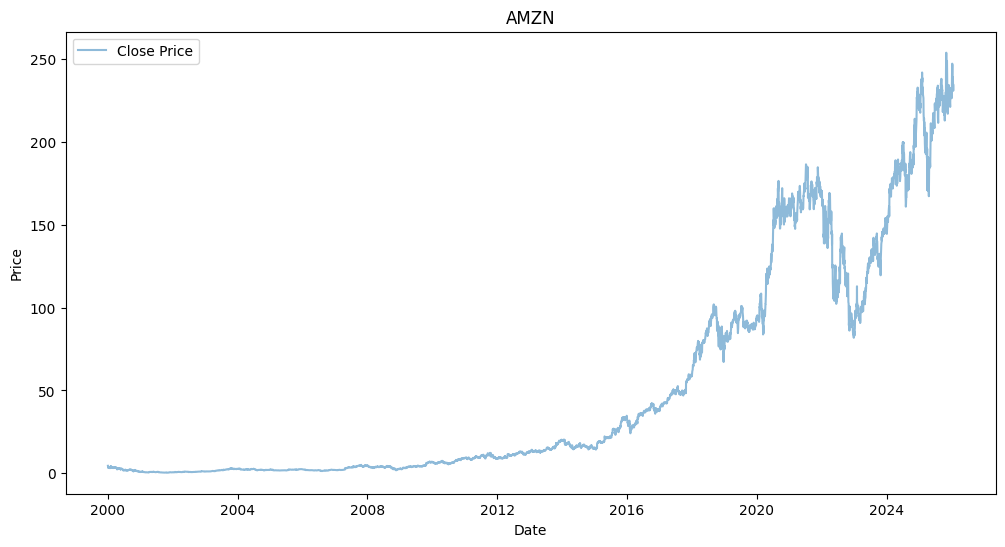

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(DF.index, DF['Close'], label='Close Price', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f"{ticker}")
plt.legend()
plt.show()

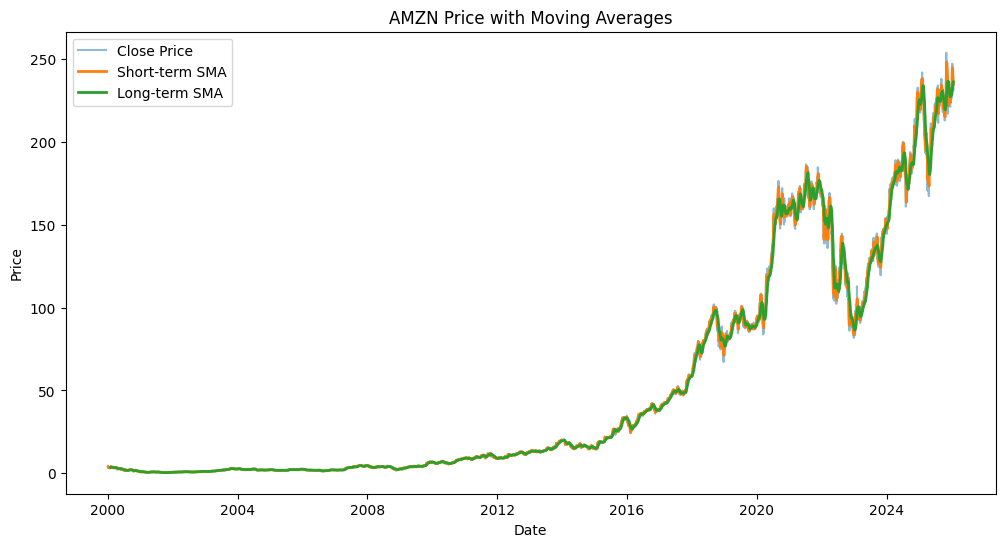

In [ ]:
#PLOT 1

plt.figure(figsize=(12,6))

plt.plot(DF.index, DF['Close'], label = 'Close Price', alpha = 0.5)
plt.plot(DF.index, DF['SMA_Short'], label='Short-term SMA', linewidth=2)
plt.plot(DF.index, DF['SMA_Long'], label='Long-term SMA', linewidth=2)

plt.title(f"{ticker} Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


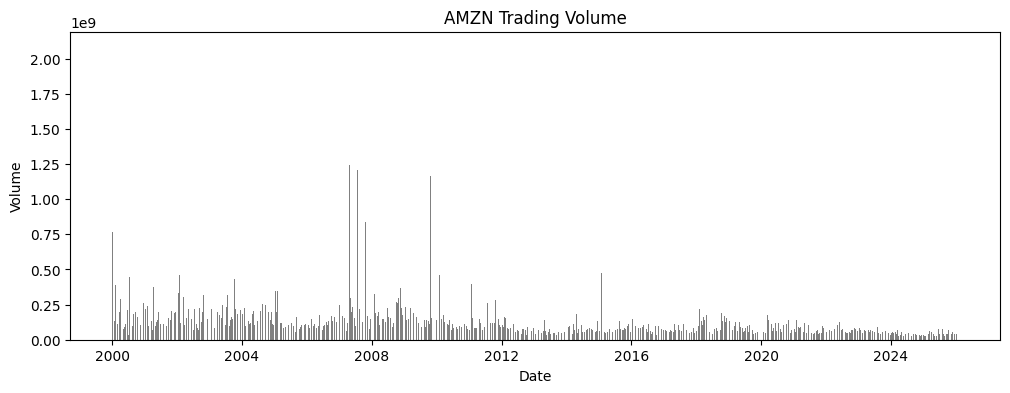

In [ ]:
#PLOT 2
plt.figure(figsize=(12,4))

plt.bar(DF.index, DF['Volume'], color= 'gray')

plt.title(f"{ticker} Trading Volume")
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

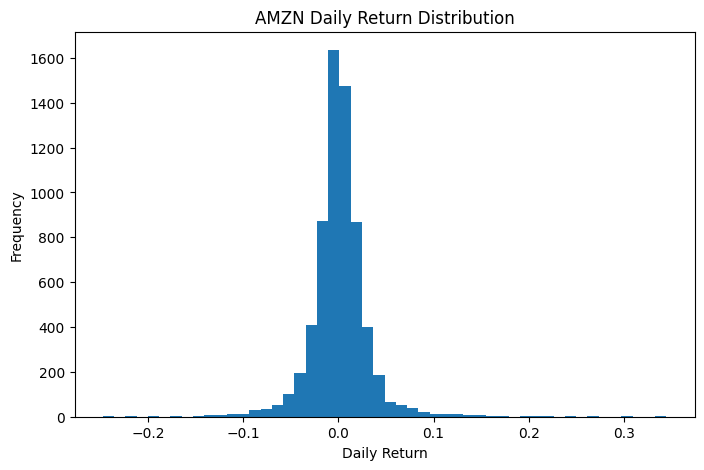

In [ ]:
# PLOT 3

plt.figure(figsize=(8, 5))

plt.hist(DF['daily_return'].dropna(), bins=50)

plt.title(f"{ticker} Daily Return Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()


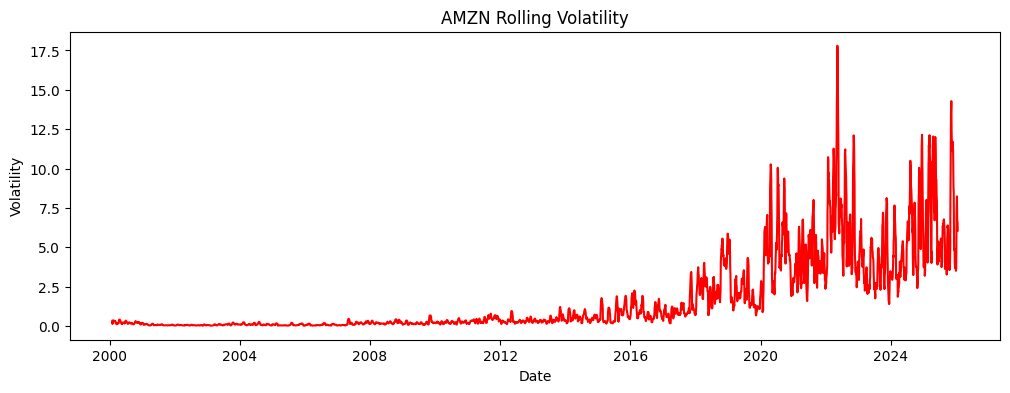

In [ ]:
#PLOT 4
plt.figure(figsize=(12, 4))

plt.plot(DF.index, DF['Rolling_Volatility'], color='red')

plt.title(f"{ticker} Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.show()
